# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.  
  
### Attribute Information:
  
For more information, read [Cho et al, 2020].  
  
1. station - used weather station number: 1 to 25  
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')  
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6  
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9  
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5  
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100  
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5  
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6  
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9  
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4  
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97  
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97  
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98  
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97  
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7  
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6  
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8  
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7  
19. lat - Latitude (Â°): 37.456 to 37.645  
20. lon - Longitude (Â°): 126.826 to 127.135  
21. DEM - Elevation (m): 12.4 to 212.3  
22. Slope - Slope (Â°): 0.1 to 5.2  
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9  
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9  
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T  

## Predict:  
You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

## Understanding the Data

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

## Preparation of the Data

In [7]:
LDAPS_NULL = (df.query('LDAPS_RHmin.isna() and LDAPS_RHmax.isna() and LDAPS_WS.isna() and LDAPS_LH.isna() and LDAPS_CC1.isna() and LDAPS_CC2.isna()', engine='python'))
LDAPS_NULL

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,10-08-2013,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,10-08-2013,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,10-08-2013,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,10-08-2013,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,10-08-2013,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,20-08-2016,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,20-08-2016,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,20-08-2016,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,20-08-2016,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


In [8]:
df = df.drop(LDAPS_NULL.index)

In [9]:
Tmin_max_NULL = (df.query('Present_Tmax.isna() and Present_Tmin.isna()', engine='python'))
Tmin_max_NULL

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,09-07-2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5925.883789,23.4,22.0
271,22.0,10-07-2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,...,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1
300,1.0,12-07-2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,...,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.7850,5893.265625,23.2,20.5
450,1.0,18-07-2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,...,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.7850,5812.293457,27.6,21.8
464,15.0,18-07-2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,...,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.8552,5681.875000,30.7,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,5.0,24-08-2017,NaN,NaN,38.403931,94.790405,29.929818,22.127591,5.817882,145.726477,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4677.062012,31.3,21.5
7596,22.0,24-08-2017,NaN,NaN,33.681381,91.842178,30.826400,22.978260,5.994230,103.179477,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,4672.853027,31.6,22.4
7605,6.0,25-08-2017,NaN,NaN,24.100304,76.861076,28.999651,20.800666,6.511712,71.307767,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,4653.651855,29.5,21.5
7629,5.0,26-08-2017,NaN,NaN,43.755058,83.340240,25.842338,18.532986,4.926595,97.230757,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4602.118164,26.1,17.9


In [10]:
df = df.drop(Tmin_max_NULL.index)

In [11]:
Next_T_NULL = (df.query('Next_Tmax.isna() and Next_Tmin.isna()', engine='python'))
Next_T_NULL

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
831,7.0,02-08-2013,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN
1073,24.0,11-08-2013,34.2,25.1,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN
2465,16.0,05-08-2014,28.8,23.1,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,...,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN
3696,22.0,23-07-2015,30.4,23.4,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,...,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN
3714,15.0,24-07-2015,24.6,22.4,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,...,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN
4205,6.0,13-08-2015,30.8,23.9,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN
5656,7.0,09-08-2016,33.1,26.8,64.725151,90.769173,31.730979,26.316541,5.095636,127.601342,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5140.230957,NaN,NaN
6268,19.0,02-07-2017,25.6,21.7,84.423805,99.652794,24.881373,22.821416,9.236040,41.559663,...,11.237815,0.000000,0.025666,37.5776,126.938,75.0924,1.7678,5882.380371,NaN,NaN
6435,11.0,09-07-2017,28.8,24.5,77.014175,90.517715,28.321989,24.563500,10.349091,53.364445,...,0.049561,0.073857,0.013500,37.5372,127.085,28.7000,0.6233,5795.268066,NaN,NaN
6907,8.0,28-07-2017,27.5,24.3,54.392185,88.281052,30.742290,25.195872,6.311136,44.619934,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5483.880859,NaN,NaN


In [12]:
df = df.drop(Next_T_NULL.index)

In [13]:
St_Date_NULL = (df.query('station.isna() and Date.isna()', engine='python'))
St_Date_NULL

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [14]:
df = df.drop(St_Date_NULL.index)

In [15]:
# extract the month from the date column
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Month'] = df['Date'].dt.month

In [17]:
# drop station and date columns
df = df.drop(['station', 'Date'], axis=1)

In [18]:
df['Month'].value_counts()

Month
7    3820
8    3652
6     116
Name: count, dtype: int64

In [19]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6


In [20]:
df['LDAPS_PPT3'].value_counts()

LDAPS_PPT3
0.000000    5237
0.001953      10
0.000852       4
0.002604       3
0.001196       2
            ... 
0.038018       1
0.028196       1
0.003034       1
0.121254       1
0.021030       1
Name: count, Length: 2326, dtype: int64

In [21]:
df['LDAPS_PPT4'].value_counts()

LDAPS_PPT4
0.000000    5690
0.001953       3
0.001105       2
0.001909       2
0.000046       2
            ... 
0.005363       1
0.001990       1
0.002798       1
0.016436       1
3.093815       1
Name: count, Length: 1892, dtype: int64

In [22]:
df = df.drop(['LDAPS_PPT3', 'LDAPS_PPT4'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7588 non-null   float64
 1   Present_Tmin      7588 non-null   float64
 2   LDAPS_RHmin       7588 non-null   float64
 3   LDAPS_RHmax       7588 non-null   float64
 4   LDAPS_Tmax_lapse  7588 non-null   float64
 5   LDAPS_Tmin_lapse  7588 non-null   float64
 6   LDAPS_WS          7588 non-null   float64
 7   LDAPS_LH          7588 non-null   float64
 8   LDAPS_CC1         7588 non-null   float64
 9   LDAPS_CC2         7588 non-null   float64
 10  LDAPS_CC3         7588 non-null   float64
 11  LDAPS_CC4         7588 non-null   float64
 12  LDAPS_PPT1        7588 non-null   float64
 13  LDAPS_PPT2        7588 non-null   float64
 14  lat               7588 non-null   float64
 15  lon               7588 non-null   float64
 16  DEM               7588 non-null   float64
 17  

In [24]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
dtype: int64

## Understanding Features

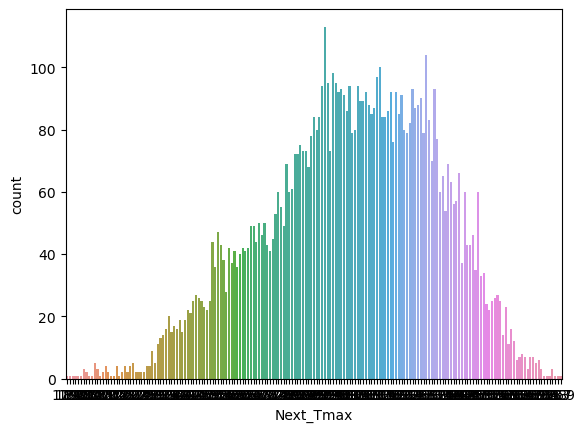

In [25]:
sns.countplot(x='Next_Tmax', data=df);

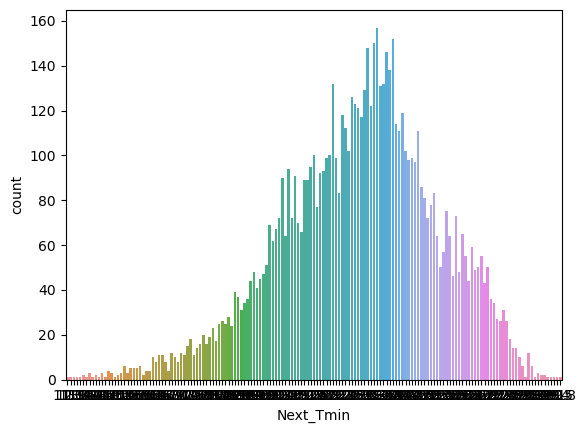

In [26]:
sns.countplot(x='Next_Tmin', data=df);

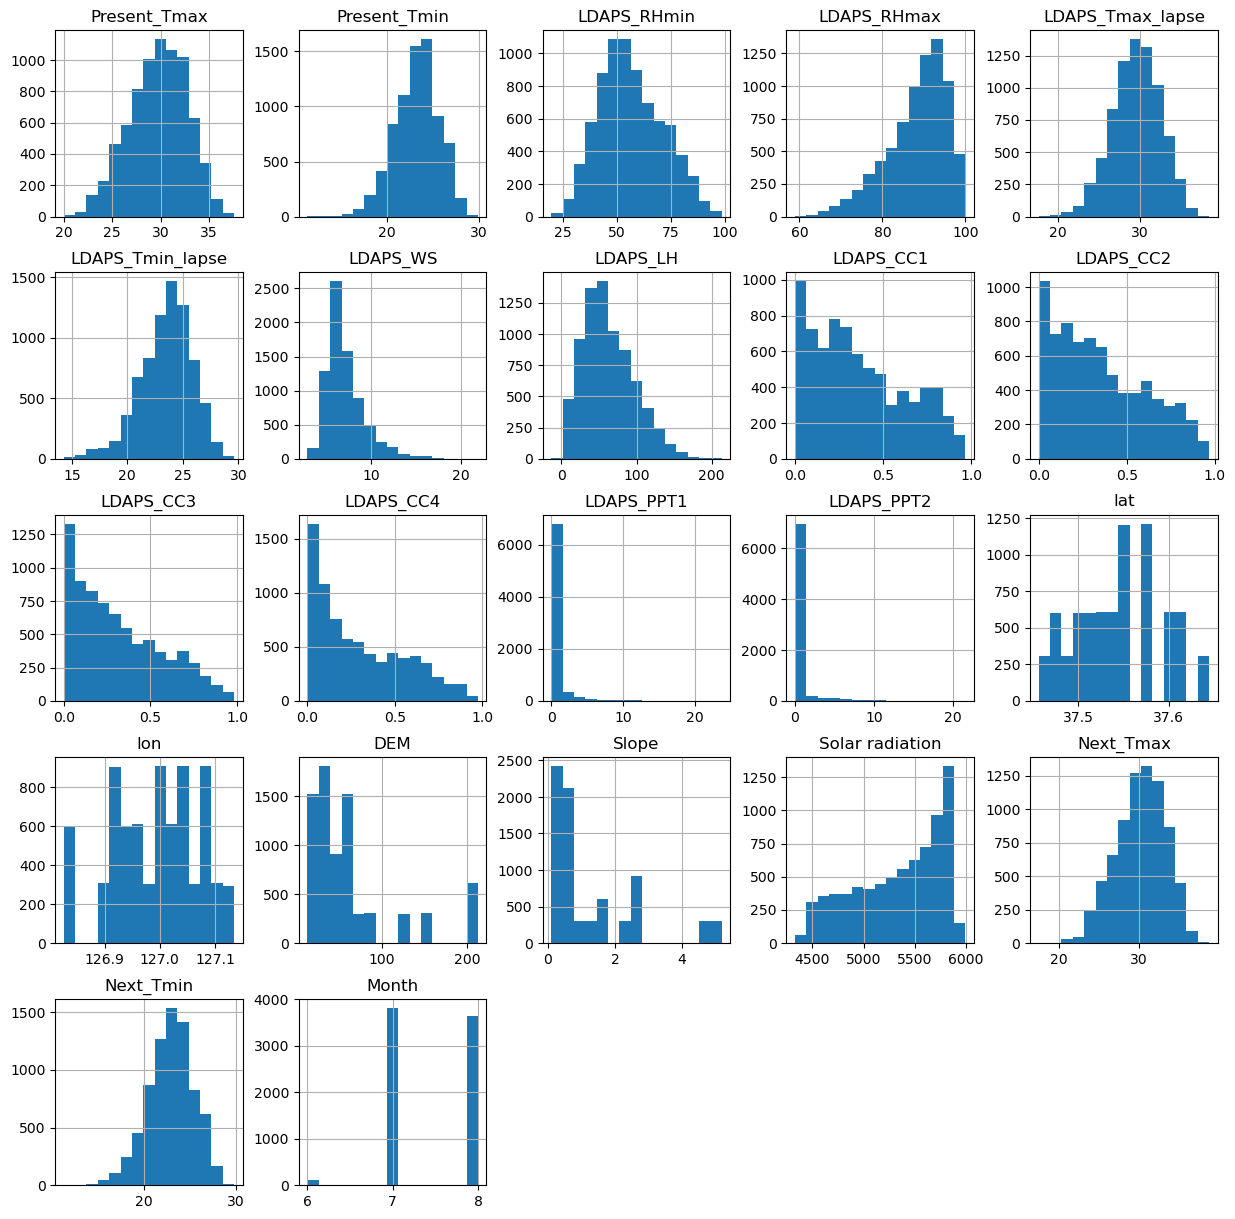

In [27]:
df.hist(bins=15,figsize=(15,15));

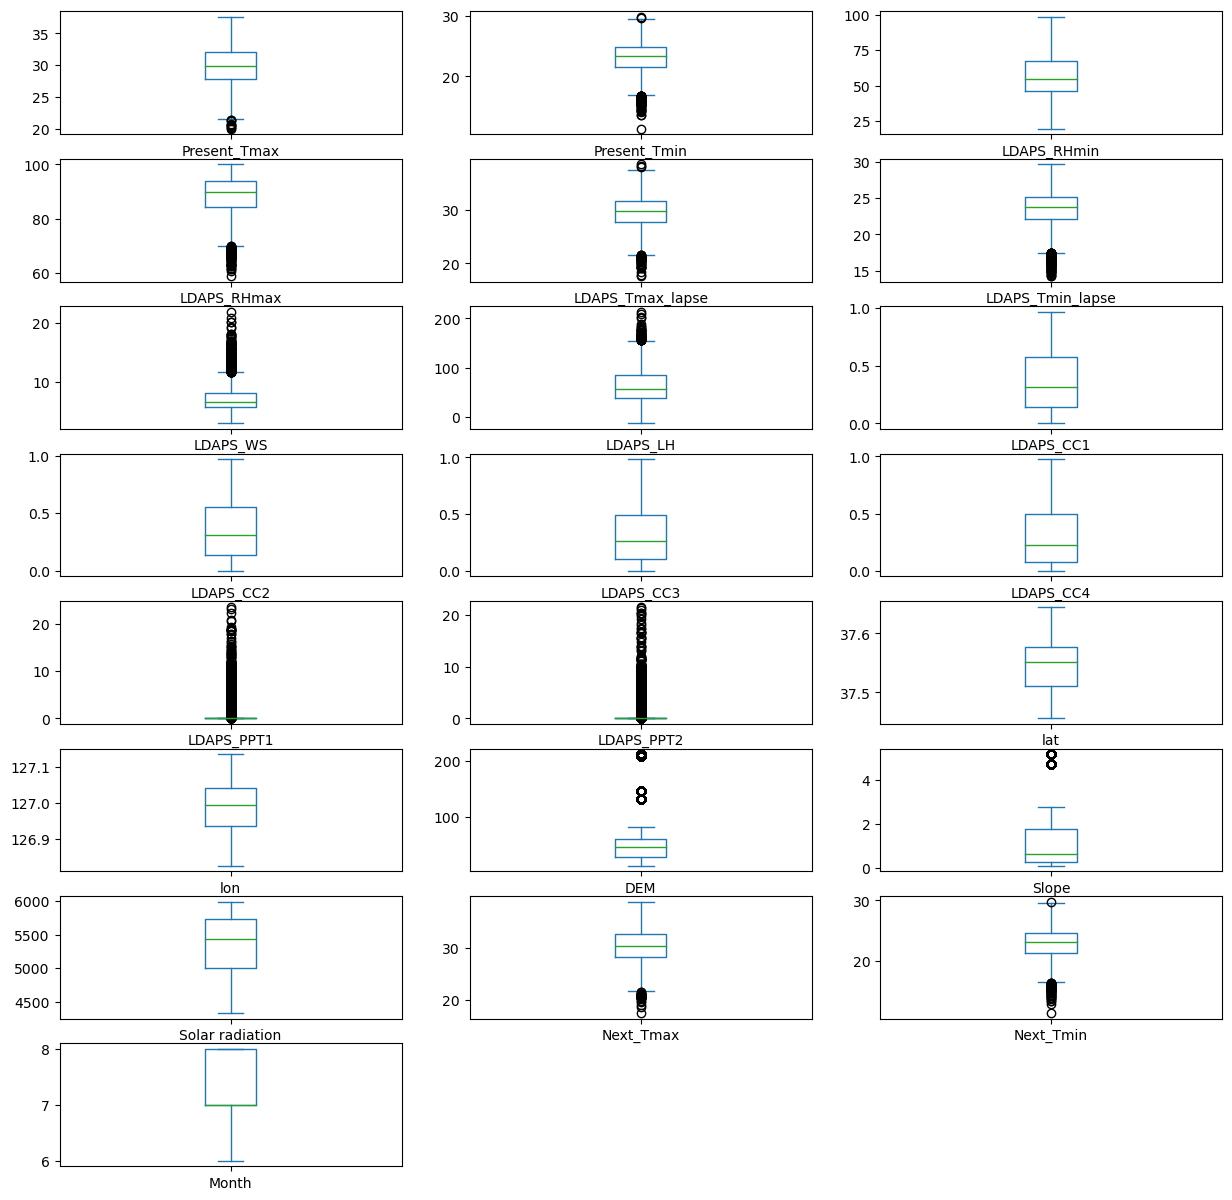

In [28]:
df.plot(kind='box',subplots=True,layout=(8,3),figsize=(15,15));

## Understanding Feature Relationships

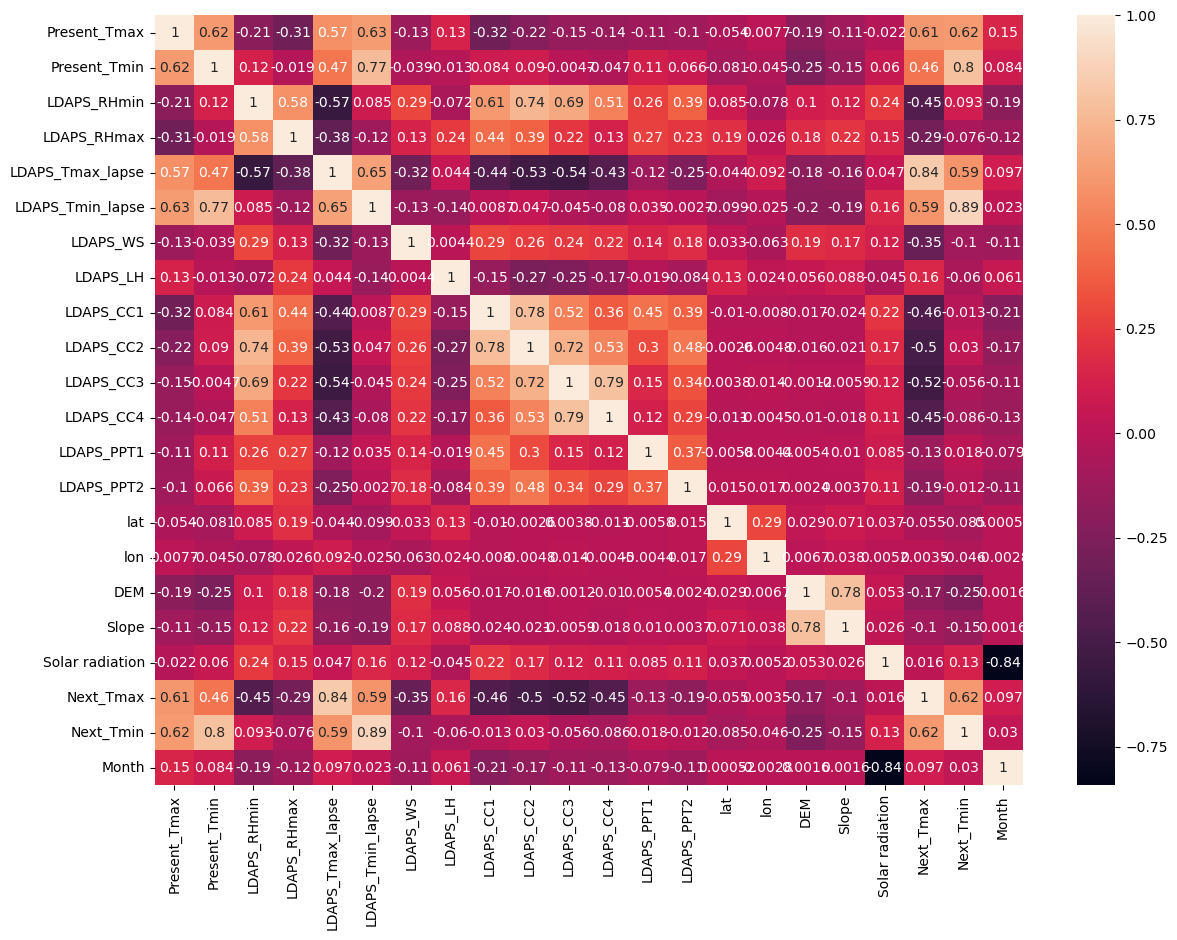

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [30]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8


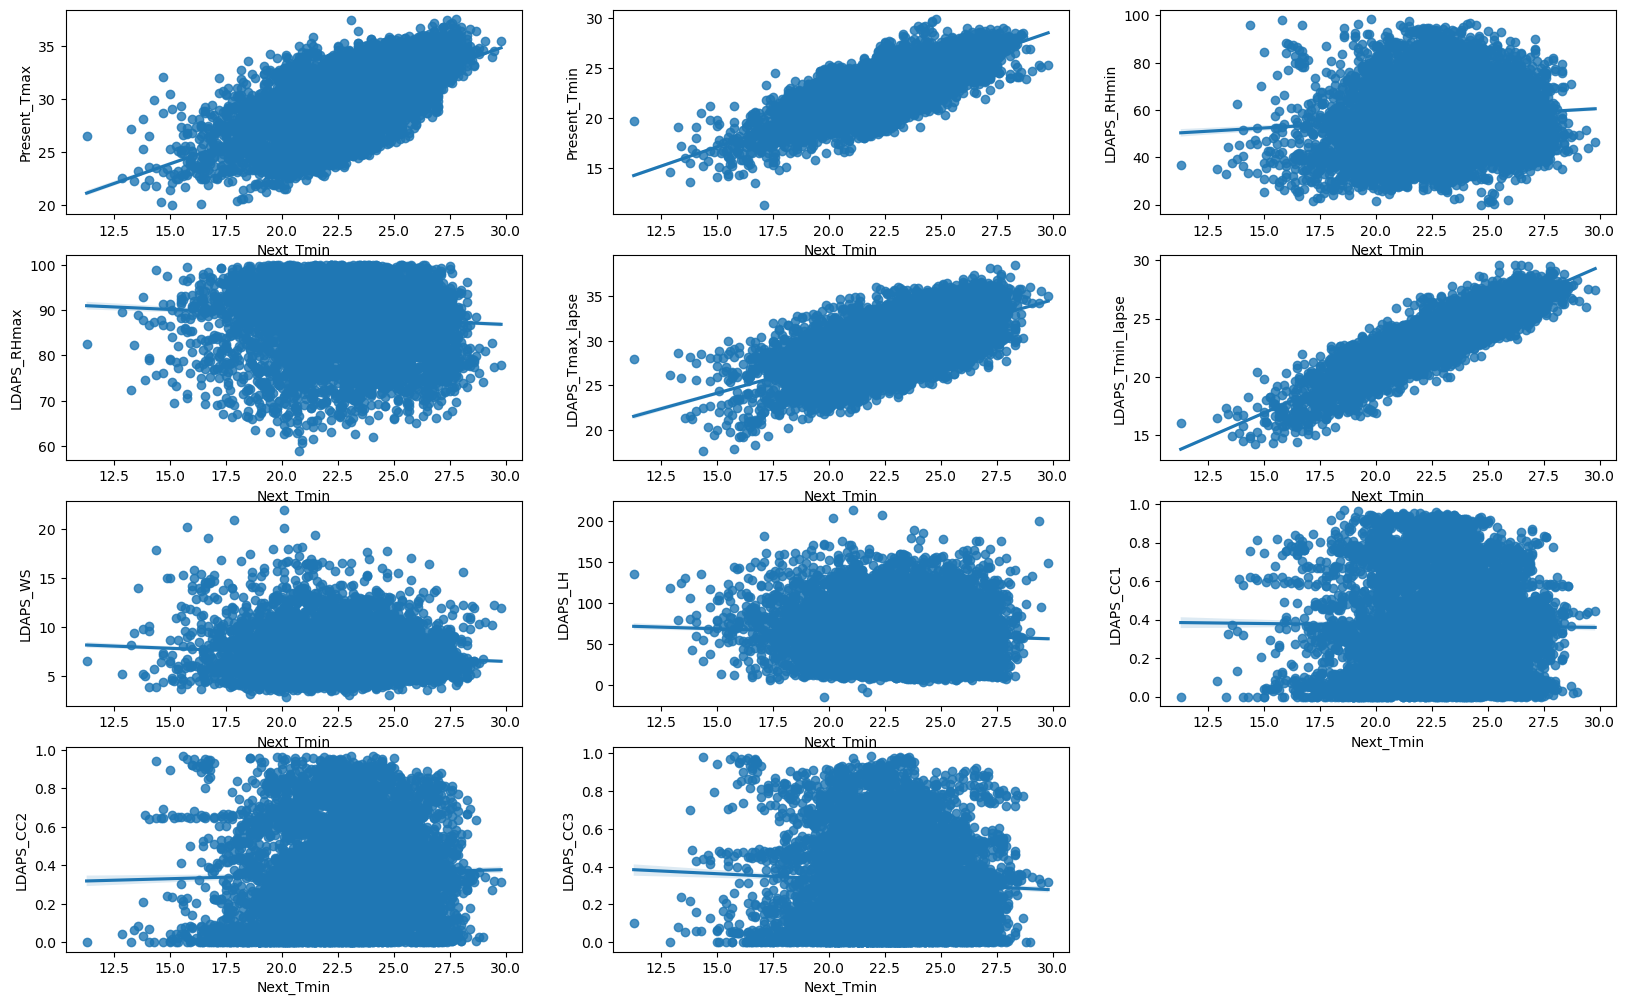

In [31]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(8,3,p)
        sns.regplot(x='Next_Tmin', y=i, data=df)
        plt.xlabel('Next_Tmin')
        plt.ylabel(i)
    p+=1
plt.show()

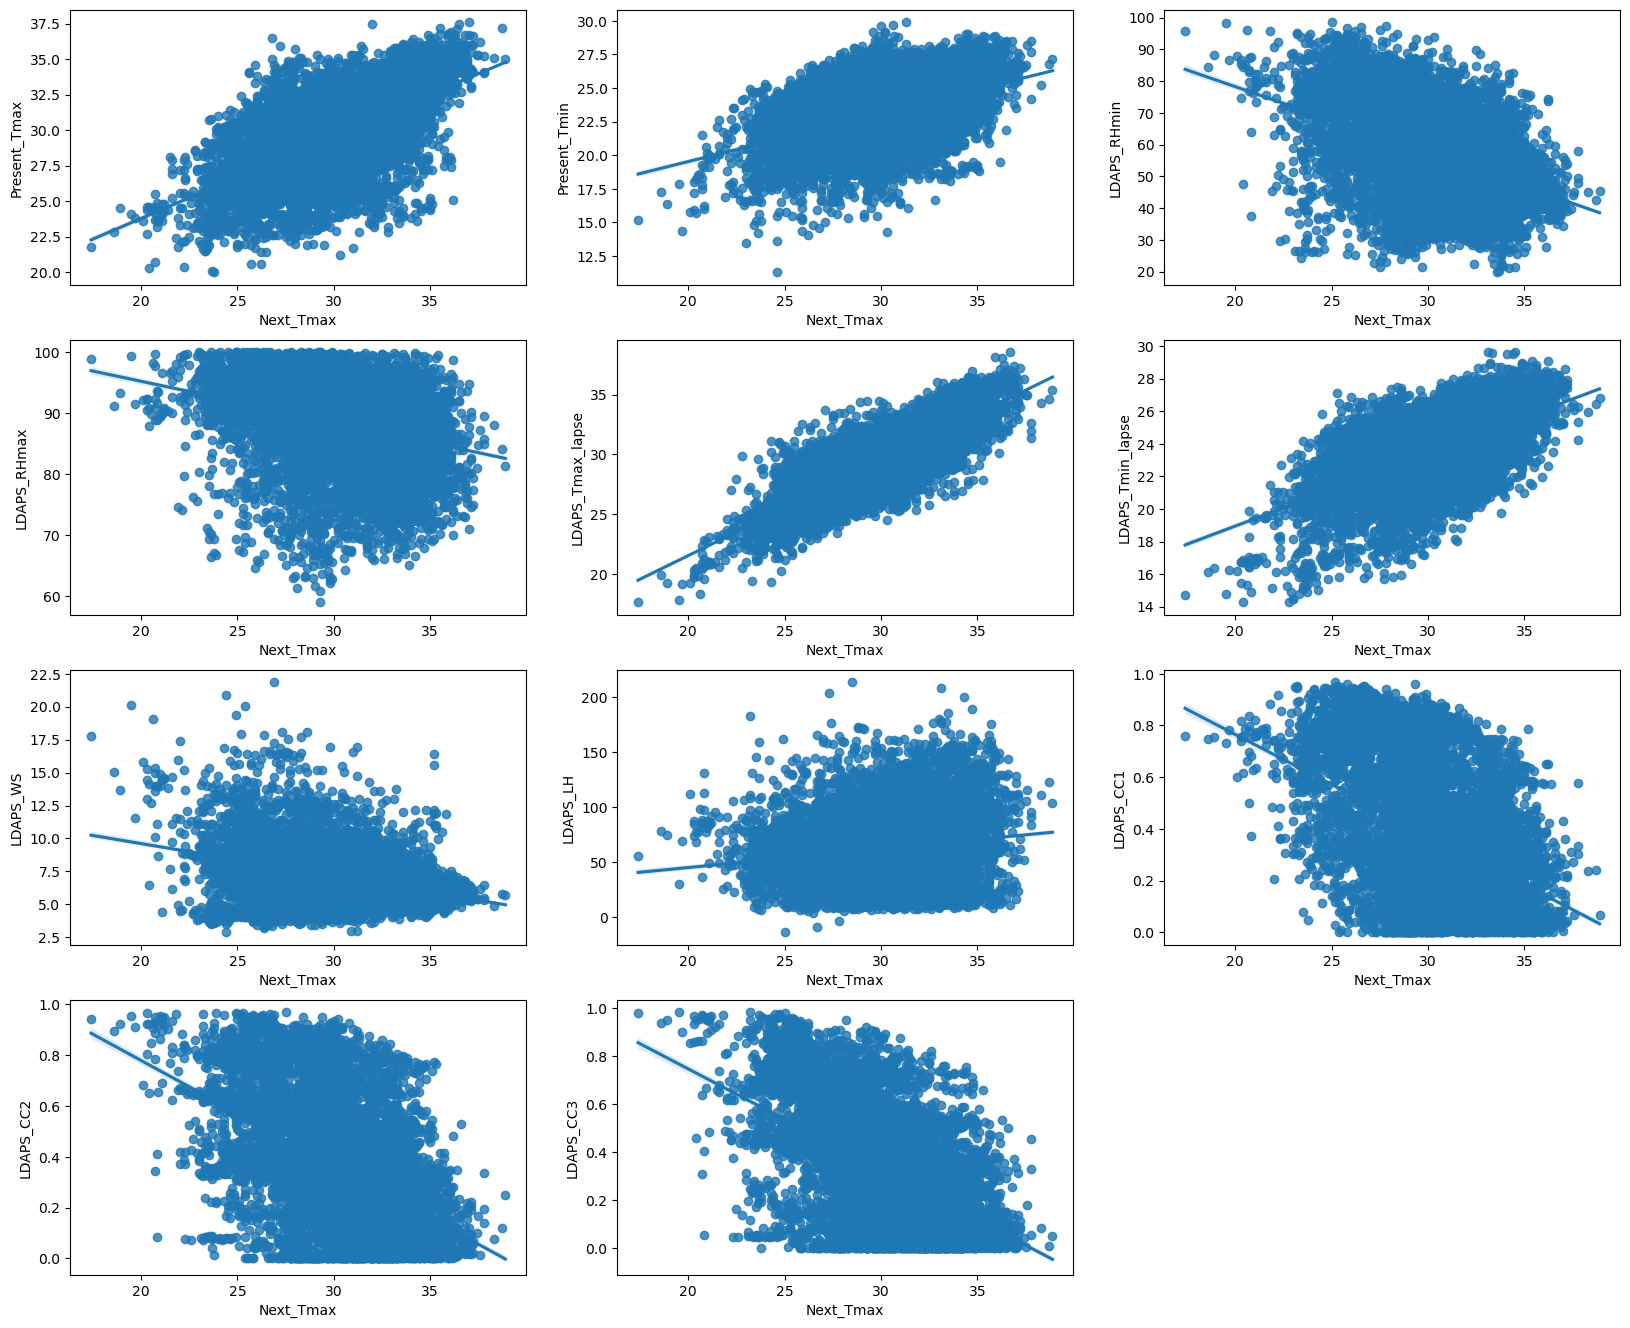

In [32]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(6,3,p)
        sns.regplot(x='Next_Tmax', y=i, data=df)
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
    p+=1
plt.show()

## Model Preparation - Next_Tmin

In [33]:
df_skew = df.skew()
df_skew

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Month              -0.174856
dtype: float64

In [34]:
for index, value in df_skew.items():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.989682
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.813885
LDAPS_WS            0.877761
LDAPS_LH           -0.348066
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3          -0.559701
LDAPS_CC4          -0.458425
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
lat                 0.085377
lon                -0.289048
DEM                 0.919265
Slope               0.612855
Solar radiation    -0.588081
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Month              -0.174856
dtype: float64

In [35]:
x = df.drop(['Next_Tmin'], axis=1)
y = df[['Next_Tmin']]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,288.185862,Present_Tmax
1,297.265548,Present_Tmin
2,103.961020,LDAPS_RHmin
3,2818.097918,LDAPS_RHmax
4,905.917760,LDAPS_Tmax_lapse
5,6066.618995,LDAPS_Tmin_lapse
6,142.277620,LDAPS_WS
7,39.592339,LDAPS_LH
8,14.416962,LDAPS_CC1
9,17.192181,LDAPS_CC2


In [37]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [38]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,2.850359,Present_Tmax
1,3.152331,Present_Tmin
2,6.488333,LDAPS_RHmin
3,2.207612,LDAPS_RHmax
4,9.336677,LDAPS_Tmax_lapse
5,7.215050,LDAPS_Tmin_lapse
6,1.279042,LDAPS_WS
7,1.485005,LDAPS_LH
8,4.847413,LDAPS_CC1
9,5.936703,LDAPS_CC2


In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation - Next_Tmin

In [40]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

  2%|▏         | 1/42 [00:00<00:36,  1.13it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8106409910623564, 'Adjusted R-Squared': 0.8085201701622549, 'RMSE': 1.0764408701693466, 'Time taken': 0.8875019550323486}


  5%|▍         | 2/42 [00:02<01:04,  1.60s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8996731543702965, 'Adjusted R-Squared': 0.8985494936992438, 'RMSE': 0.7835302563559353, 'Time taken': 2.09586763381958}
{'Model': 'BayesianRidge', 'R-Squared': 0.8465736719360109, 'Adjusted R-Squared': 0.8448552970616942, 'RMSE': 0.9689405653079505, 'Time taken': 0.04674100875854492}


 10%|▉         | 4/42 [00:03<00:25,  1.50it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7944524221681699, 'Adjusted R-Squared': 0.7921502892964534, 'RMSE': 1.121510578576849, 'Time taken': 0.16551542282104492}
{'Model': 'DummyRegressor', 'R-Squared': -1.0354397837142315e-05, 'Adjusted R-Squared': -0.011210470367092995, 'RMSE': 2.4737137387263552, 'Time taken': 0.013945579528808594}
{'Model': 'ElasticNet', 'R-Squared': 0.6917391623493492, 'Adjusted R-Squared': 0.6882866409676618, 'RMSE': 1.3734294948640982, 'Time taken': 0.03708219528198242}


 17%|█▋        | 7/42 [00:03<00:12,  2.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8464045235503888, 'Adjusted R-Squared': 0.844684254214153, 'RMSE': 0.9694745335875704, 'Time taken': 0.31355738639831543}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7789830721412373, 'Adjusted R-Squared': 0.7765076825492192, 'RMSE': 1.1629471042643411, 'Time taken': 0.05027604103088379}


 21%|██▏       | 9/42 [00:06<00:25,  1.30it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.919959102713078, 'Adjusted R-Squared': 0.9190626446634644, 'RMSE': 0.6998470994242122, 'Time taken': 3.0159547328948975}
{'Model': 'GammaRegressor', 'R-Squared': 0.7669401595646695, 'Adjusted R-Squared': 0.7643298893517938, 'RMSE': 1.1942105816829143, 'Time taken': 0.038941144943237305}


 26%|██▌       | 11/42 [00:12<00:45,  1.48s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -14.102056152092256, 'Adjusted R-Squared': -14.27119918099569, 'RMSE': 9.61313924464283, 'Time taken': 5.755704879760742}


 29%|██▊       | 12/42 [00:16<01:01,  2.04s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8951116056515582, 'Adjusted R-Squared': 0.8939368556348557, 'RMSE': 0.801144602846311, 'Time taken': 4.348363876342773}


 33%|███▎      | 14/42 [00:20<00:52,  1.88s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.940612417365722, 'Adjusted R-Squared': 0.939947276440218, 'RMSE': 0.6028302215014639, 'Time taken': 3.760874032974243}
{'Model': 'HuberRegressor', 'R-Squared': 0.8456938738036129, 'Adjusted R-Squared': 0.8439656451902133, 'RMSE': 0.9717147094576213, 'Time taken': 0.17765545845031738}


 36%|███▌      | 15/42 [00:21<00:40,  1.51s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8902945087921258, 'Adjusted R-Squared': 0.8890658072905976, 'RMSE': 0.8193347520711559, 'Time taken': 0.4149661064147949}


 38%|███▊      | 16/42 [00:23<00:46,  1.79s/it]

{'Model': 'KernelRidge', 'R-Squared': -84.79166874276456, 'Adjusted R-Squared': -85.75253543268353, 'RMSE': 22.912356098631623, 'Time taken': 2.5495824813842773}
{'Model': 'Lars', 'R-Squared': 0.8466172103600101, 'Adjusted R-Squared': 0.8448993231160422, 'RMSE': 0.9688030754163726, 'Time taken': 0.06889581680297852}


 43%|████▎     | 18/42 [00:23<00:25,  1.07s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8464848602096422, 'Adjusted R-Squared': 0.8447654906439902, 'RMSE': 0.9692209631898875, 'Time taken': 0.16162109375}
{'Model': 'Lasso', 'R-Squared': 0.625146550656057, 'Adjusted R-Squared': 0.6209481920234048, 'RMSE': 1.514530237559349, 'Time taken': 0.0481717586517334}


 52%|█████▏    | 22/42 [00:24<00:10,  1.97it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8465099005222, 'Adjusted R-Squared': 0.8447908114080487, 'RMSE': 0.9691419137044711, 'Time taken': 0.3991661071777344}
{'Model': 'LassoLars', 'R-Squared': 0.6251357695728763, 'Adjusted R-Squared': 0.6209372901920924, 'RMSE': 1.5145520169495312, 'Time taken': 0.033649444580078125}
{'Model': 'LassoLarsCV', 'R-Squared': 0.846570891203263, 'Adjusted R-Squared': 0.8448524851847395, 'RMSE': 0.9689493459148597, 'Time taken': 0.09923887252807617}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8463570995424787, 'Adjusted R-Squared': 0.8446362990573545, 'RMSE': 0.9696241891003949, 'Time taken': 0.029837369918823242}
{'Model': 'LinearRegression', 'R-Squared': 0.8466172103600101, 'Adjusted R-Squared': 0.8448993231160422, 'RMSE': 0.9688030754163725, 'Time taken': 0.03104996681213379}


 60%|█████▉    | 25/42 [00:24<00:05,  3.14it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.8448311328003636, 'Adjusted R-Squared': 0.8430932414877277, 'RMSE': 0.9744274001339159, 'Time taken': 0.14345502853393555}


 62%|██████▏   | 26/42 [00:34<00:31,  1.98s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8998086484750623, 'Adjusted R-Squared': 0.8986865053379829, 'RMSE': 0.7830009882500567, 'Time taken': 10.076656579971313}


 69%|██████▉   | 29/42 [00:38<00:19,  1.48s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9187618099334227, 'Adjusted R-Squared': 0.917851942204677, 'RMSE': 0.7050620058693061, 'Time taken': 3.4710724353790283}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.812984553210967, 'Adjusted R-Squared': 0.8108899802069298, 'RMSE': 1.0697589588972862, 'Time taken': 0.03589320182800293}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8354637126266314, 'Adjusted R-Squared': 0.8336209062080497, 'RMSE': 1.0034091094886148, 'Time taken': 0.0795140266418457}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7784745084419429, 'Adjusted R-Squared': 0.7759934229364926, 'RMSE': 1.1642843159744716, 'Time taken': 0.04026603698730469}


 74%|███████▍  | 31/42 [00:38<00:10,  1.00it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8451725036061714, 'Adjusted R-Squared': 0.8434384356465605, 'RMSE': 0.9733549420225498, 'Time taken': 0.07733869552612305}


 79%|███████▊  | 33/42 [00:38<00:06,  1.35it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7247712982479668, 'Adjusted R-Squared': 0.721688736788344, 'RMSE': 1.297759012132794, 'Time taken': 0.3807942867279053}


 88%|████████▊ | 37/42 [00:57<00:11,  2.27s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9111933777310379, 'Adjusted R-Squared': 0.9101987435616256, 'RMSE': 0.7371737613713623, 'Time taken': 18.381455898284912}
{'Model': 'Ridge', 'R-Squared': 0.8466110588985553, 'Adjusted R-Squared': 0.844893102758219, 'RMSE': 0.9688225022863578, 'Time taken': 0.032797813415527344}
{'Model': 'RidgeCV', 'R-Squared': 0.8465511684725694, 'Adjusted R-Squared': 0.8448325415594622, 'RMSE': 0.96901162129746, 'Time taken': 0.05770707130432129}
{'Model': 'SGDRegressor', 'R-Squared': 0.8460700058542063, 'Adjusted R-Squared': 0.8443459899197734, 'RMSE': 0.9705296753442381, 'Time taken': 0.06258583068847656}


 93%|█████████▎| 39/42 [01:02<00:06,  2.28s/it]

{'Model': 'SVR', 'R-Squared': 0.9218676101705631, 'Adjusted R-Squared': 0.9209925274044733, 'RMSE': 0.6914531298642222, 'Time taken': 4.532309293746948}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8466172103600101, 'Adjusted R-Squared': 0.8448993231160422, 'RMSE': 0.9688030754163725, 'Time taken': 0.06420302391052246}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7630191099949515, 'Adjusted R-Squared': 0.7603649240268949, 'RMSE': 1.2042145097219252, 'Time taken': 0.06465578079223633}


 98%|█████████▊| 41/42 [01:03<00:01,  1.84s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9373133293261402, 'Adjusted R-Squared': 0.936611238614593, 'RMSE': 0.6193480792596109, 'Time taken': 1.5219407081604004}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3857
[LightGBM] [Info] Number of data points in the train set: 5691, number of used features: 21
[LightGBM] [Info] Start training from score 22.912810


100%|██████████| 42/42 [01:04<00:00,  1.53s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.93872292082918, 'Adjusted R-Squared': 0.9380366175424668, 'RMSE': 0.6123450629929603, 'Time taken': 0.7647039890289307}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.94       0.94  0.60        3.76
LGBMRegressor                                0.94       0.94  0.61        0.76
XGBRegressor                                 0.94       0.94  0.62        1.52
SVR                                          0.92       0.92  0.69        4.53
ExtraTreesRegressor                          0.92       0.92  0.70        3.02
NuSVR                                        0.92       0.92  0.71        3.47
RandomForestRegressor                        0.91       0.91  0.74       18.38
MLPRegressor                                 0.90       0.90  0.78       10.08
BaggingRegressor                             0.9

## Model Evaluation - Next_Tmin

In [41]:
from sklearn.ensemble import HistGradientBoostingRegressor
HGB_min_reg = HistGradientBoostingRegressor()

In [42]:
HGB_min_reg.fit(xtrain,ytrain)

HistGradientBoostingRegressor()

In [43]:
grid_param = {"loss": ('squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'),
              "learning_rate": (0.01, 0.1, 1, 10),
              "max_leaf_nodes": (3, 10, 30, 50)}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=HGB_min_reg, param_grid=grid_param, cv=2, verbose=3)

In [45]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=3;, score=0.618 total time=   0.4s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=3;, score=0.611 total time=   0.4s
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=10;, score=0.697 total time=   2.0s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=10;, score=0.696 total time=   1.3s
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=30;, score=0.726 total time=   2.8s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=30;, score=0.724 total time=   2.8s
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=50;, score=0.738 total time=   6.3s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=50;, score=0.734 total time=   5.6s
[CV 1/2] END learning_rate=0.01, loss=absolute_error, max_leaf_nodes=3;, score=0.554 total time=   0.4s
[CV 

GridSearchCV(cv=2, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': (0.01, 0.1, 1, 10),
                         'loss': ('squared_error', 'absolute_error', 'gamma',
                                  'poisson', 'quantile'),
                         'max_leaf_nodes': (3, 10, 30, 50)},
             verbose=3)

In [46]:
grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'poisson', 'max_leaf_nodes': 50}

In [47]:
Final_model_Tmin = HistGradientBoostingRegressor(learning_rate=0.1, loss='squared_error', max_leaf_nodes=50)

In [48]:
Final_model_Tmin.fit(xtrain,ytrain)

HistGradientBoostingRegressor(max_leaf_nodes=50)

In [49]:
from sklearn.metrics import r2_score

rd_pred= Final_model_Tmin.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  94.35254465015777


## Model Preparation - Next_Tmax

In [50]:
xmx = df.drop(['Next_Tmax'], axis=1)
ymx = df[['Next_Tmax']]

In [51]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(xmx.values,i)
                        for i in range(len(xmx.columns))]
vif["Features"] = xmx.columns

vif

,VIF values,Features
0,280.20,Present_Tmax
1,330.28,Present_Tmin
2,104.55,LDAPS_RHmin
3,2819.14,LDAPS_RHmax
4,752.47,LDAPS_Tmax_lapse
5,7694.64,LDAPS_Tmin_lapse
6,138.29,LDAPS_WS
7,38.94,LDAPS_LH
8,14.35,LDAPS_CC1
9,17.15,LDAPS_CC2


In [52]:
scaler = preprocessing.StandardScaler()
xmx = pd.DataFrame(scaler.fit_transform(xmx), columns = xmx.columns)

In [53]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(xmx.values,i)
                        for i in range(len(xmx.columns))]
vif["Features"] = xmx.columns

vif

,VIF values,Features
0,2.77,Present_Tmax
1,3.50,Present_Tmin
2,6.52,LDAPS_RHmin
3,2.21,LDAPS_RHmax
4,7.66,LDAPS_Tmax_lapse
5,9.10,LDAPS_Tmin_lapse
6,1.24,LDAPS_WS
7,1.46,LDAPS_LH
8,4.82,LDAPS_CC1
9,5.93,LDAPS_CC2


In [54]:
xmxtrain,xmxtest,ymxtrain,ymxtest = train_test_split(xmx,ymx,test_size = .25, random_state = 39)

## Model Evaluation - Next_Tmax

In [55]:
HGB_max_reg = HistGradientBoostingRegressor()

In [56]:
HGB_max_reg.fit(xmxtrain,ymxtrain)

HistGradientBoostingRegressor()

In [57]:
grid_parammx = {"loss": ('squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'),
              "learning_rate": (0.01, 0.1, 1, 10),
              "max_leaf_nodes": (3, 10, 30, 50)}

In [58]:
grid_searchmx = GridSearchCV(estimator=HGB_max_reg, param_grid=grid_param, cv=2, verbose=3)

In [59]:
grid_searchmx.fit(xmxtrain,ymxtrain)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=3;, score=0.551 total time=   0.1s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=3;, score=0.549 total time=   0.1s
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=10;, score=0.648 total time=   0.5s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=10;, score=0.647 total time=   0.4s
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=30;, score=0.695 total time=   1.8s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=30;, score=0.691 total time=   2.0s
[CV 1/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=50;, score=0.711 total time=   2.5s
[CV 2/2] END learning_rate=0.01, loss=squared_error, max_leaf_nodes=50;, score=0.707 total time=   2.5s
[CV 1/2] END learning_rate=0.01, loss=absolute_error, max_leaf_nodes=3;, score=0.523 total time=   0.2s
[CV 

GridSearchCV(cv=2, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': (0.01, 0.1, 1, 10),
                         'loss': ('squared_error', 'absolute_error', 'gamma',
                                  'poisson', 'quantile'),
                         'max_leaf_nodes': (3, 10, 30, 50)},
             verbose=3)

In [60]:
grid_searchmx.best_params_

{'learning_rate': 0.1, 'loss': 'squared_error', 'max_leaf_nodes': 50}

## Final Model

When comparing models HistGradientBoostingRegressor had the highest adjusted r2 score of 0.94 and r2 score of 0.94 with the lowest RMSE of 0.60. It did have a long training time of 3.76, but that wasn't much of a factor due to the size of the dataset.

In [61]:
Final_model_Tmax = HistGradientBoostingRegressor(learning_rate=0.1, loss='squared_error', max_leaf_nodes=50)

In [62]:
Final_model_Tmax.fit(xmxtrain,ymxtrain)

HistGradientBoostingRegressor(max_leaf_nodes=50)

In [63]:
from sklearn.metrics import r2_score

rd_predmx= Final_model_Tmax.predict(xmxtest)
r2smx=r2_score(ymxtest, rd_predmx)
print('r2 score: ', r2smx*100)

r2 score:  92.76357413917808
